In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table

In [3]:
douglas = Table.read('../data/douglas2017.vot')

possible_singles = (np.array([len(i)==0 for i in douglas['Bin_']]) &  # Not binaries
                    np.array([i == "Y" for i in douglas['Clean_']]) & # Clean periodograms
                    np.array([i == "N" for i in douglas['Bl_']]) )    # Not blends
douglas_singles = douglas[possible_singles]
douglas_smamp = douglas_singles['SmAmp'].data / 100
douglas_smamp_mask = douglas_smamp.data[~douglas_smamp.mask]
douglas_prot = douglas_singles['Prot1'].data.data

In [7]:
amps_usc = np.load('data/usco_amps.npy')
pers_usc = np.load('data/usco_pers.npy')
amps_ucl = np.load('data/ucl_amps.npy')
pers_ucl = np.load('data/ucl_pers.npy')
amps_psc = np.load('data/psc_amps.npy')
pers_psc = np.load('data/psc_pers.npy')
amps_pra = np.load('data/pra_amps.npy') #douglas_smamp_mask[douglas_singles['Mass'] > 0.6]
pers_pra = np.load('data/pra_pers.npy') #douglas_prot[douglas_singles['Mass'] > 0.6]
amps_ngc = np.load('data/ngc_amps.npy')
pers_ngc = np.load('data/ngc_pers.npy')
amps_m67 = np.load('data/m67_amps.npy')
pers_m67 = np.load('data/m67_pers.npy')

In [8]:
n_targets = list(map(len, [amps_usc, amps_ucl, amps_psc, amps_pra, amps_ngc, amps_m67]))

print(n_targets, np.sum(n_targets))

[19, 34, 100, 220, 62, 96] 531


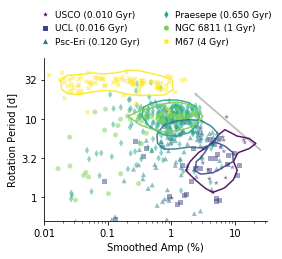

In [9]:
plt.figure(figsize=(4, 3))

s = 25
cmap = lambda x: plt.cm.viridis(x/5)
alpha = 0.5

plt.scatter(np.log10(amps_usc) + 2, np.log10(pers_usc), 
            label='USCO (0.010 Gyr)', alpha=alpha, ec='none', color=cmap(0), marker='*', s=s)
plt.scatter(np.log10(amps_ucl) + 2, np.log10(pers_ucl), 
            label='UCL (0.016 Gyr)', alpha=alpha, ec='none', color=cmap(1), marker='s', s=s)
plt.scatter(np.log10(amps_psc) + 2, np.log10(pers_psc), 
            label='Psc-Eri (0.120 Gyr)', alpha=alpha, ec='none', color=cmap(2), marker='^', s=s)
plt.scatter(np.log10(amps_pra) + 2, np.log10(pers_pra), 
            label='Praesepe (0.650 Gyr)', alpha=alpha, ec='none', color=cmap(3), marker='d', s=s)
plt.scatter(np.log10(amps_ngc) + 2, np.log10(pers_ngc), label='NGC 6811 (1 Gyr)', 
            alpha=alpha, ec='none', color=cmap(4), s=s)
plt.scatter(np.log10(amps_m67) + 2, np.log10(pers_m67), label='M67 (4 Gyr)', 
            alpha=alpha, ec='none', color=cmap(5), s=s, marker='X')

plt.xlabel('Smoothed Amp (%)')
plt.ylabel('Rotation Period [d]')

plt.arrow(1.4, 0.6, -1, 0.7, width=0.01, color='silver')

from scipy.ndimage import gaussian_filter

def plot_contour(log_smoothed_amps, log_periods, color):
    hist, xedges, yedges = np.histogram2d(log_smoothed_amps, log_periods, normed=True, 
                                              range=[np.log10([0.005, 32]), np.log10([0.3, 60])], bins=20)
    hist = gaussian_filter(hist, 0.8).T
    X, Y = np.meshgrid(0.5 * (xedges[1:] + xedges[:-1]), 0.5 * (yedges[1:] + yedges[:-1]))

    contours = plt.contour(X, Y, hist, levels=[0.9], colors=[color], alpha=0.9)
    
# plt.figure(figsize=(4, 3))
plot_contour(np.log10(amps_usc) + 2, np.log10(pers_usc), cmap(0))
plot_contour(np.log10(amps_ucl) + 2, np.log10(pers_ucl), cmap(1))
plot_contour(np.log10(amps_psc) + 2, np.log10(pers_psc), cmap(2))
plot_contour(np.log10(amps_pra) + 2, np.log10(pers_pra), cmap(3))    
plot_contour(np.log10(amps_ngc) + 2, np.log10(pers_ngc), cmap(4))
plot_contour(np.log10(amps_m67) + 2, np.log10(pers_m67), cmap(5))

ax = plt.gca()
# ax.set_xlim(np.log10([0.01, 12]))
# xticks = np.array(ax.get_xticks())
# ax.set_xticks(xticks)
# ax.set_xticklabels(["{0:.2g}".format(i) for i in 10**xticks])# , rotation=30, ha='right')

xticks = [-2, -1, 0, 1]
ax.set_xticks(xticks)
ax.set_xticklabels(["{0:.2g}".format(10**xt) for xt in xticks])
ax.set_xticks(np.log10(np.arange(0.01, 0.1, 0.01)).tolist() + 
              np.log10(np.arange(0.1, 1, 0.1)).tolist() + 
              np.log10(np.arange(1, 10, 1)).tolist() + 
              np.log10(np.arange(10, 100, 10)).tolist(), minor=True)
ax.set_xlim(np.log10([0.01, 32]))

ax.set_ylim(np.log10([0.5, 60]))
yticks = np.array(ax.get_yticks())
ax.set_yticklabels(["{0:.2g}".format(i) for i in 10**yticks])
# leg = plt.legend(loc=(0.4, 1.05), framealpha=0.8, frameon=False)#(0, 1.01))
leg = plt.legend(loc=(-0.05, 1.05), framealpha=0.8, 
                 frameon=False, ncol=2, fontsize=9, handletextpad=0)

for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
# plt.annotate("Uniform", np.log10([0.012, 0.58]), fontsize=8)
# plt.annotate("Asymmetric", np.log10([7, 0.58]), fontsize=8)

# http://matplotlib.1069221.n5.nabble.com/Right-align-legend-contents-td13119.html
# vp = leg._legend_box._children[-1]._children[0] 
# for c in vp._children: 
#     c._children.reverse() 
# vp.align = "right" 

for s in ['right', 'top']:
    ax.spines[s].set_visible(False)
    
plt.savefig('plots/clusters.pdf', bbox_inches='tight')

[-0.49813726 -0.2519301 ] [0.1660559  0.25192657]


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log10
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in log10
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log10
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in log10


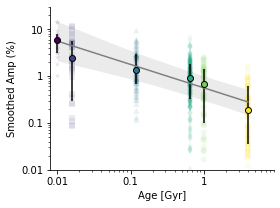

In [12]:
import seaborn
import scipy.special as sp

x = []
y = []
yerr = []

def plot_age(age_gyr, log_smoothed_amp, color, marker):

    plt.scatter(np.log10(age_gyr) * np.ones_like(log_smoothed_amp), log_smoothed_amp, 
                color=color, marker=marker, alpha=0.1, ec='none')
    
    lo, med, hi = np.nanpercentile(log_smoothed_amp, [16, 50, 84])
    yerrs = [[med-lo], [hi-med]]
    
    plt.errorbar(np.log10(age_gyr), np.nanmedian(log_smoothed_amp), yerrs,
                 color=color, fmt='o', ecolor='black', mec='k')

    x.append(np.log10(age_gyr))
    y.append(np.nanmedian(log_smoothed_amp))
    yerr.append(np.mean(yerrs))

plt.figure(figsize=(4, 3))
plot_age(0.01, np.log10(amps_usc) + 2, cmap(0), '*')
plot_age(0.016, np.log10(amps_ucl) + 2, cmap(1), 's')
plot_age(0.12, np.log10(amps_psc) + 2, cmap(2), '^')
plot_age(0.65, np.log10(amps_pra) + 2, cmap(3), 'd')
plot_age(1.0, np.log10(amps_ngc) + 2, cmap(4), 'o')
plot_age(4.0, np.log10(amps_m67) + 2, cmap(5), 'X')
    
x = np.array(x)
y = np.array(y)
yerr = np.array(yerr)

X = np.vander(x, 2)
Omega_0 = np.diag(yerr**2)
inv_Omega_0 = np.linalg.inv(Omega_0)
c0 = np.linalg.inv(X.T @ inv_Omega_0 @ X) @ X.T @ inv_Omega_0 @ y
c0err = np.diag(np.linalg.inv(X.T @ inv_Omega_0 @ X))**0.5
print(c0, c0err)

plt.plot(x, X @ c0, color='gray')
plt.plot(np.log10(x), X @ c0, color='gray')

m = c0[0]   #-0.39354186
m_err = c0err[0]  # 0.15938645
b = c0[1] #-1.906516
b_err = c0err[1] #0.21192405

n = 5000
t = np.linspace(0.01, 4, 100)  # Gyr
f_S = 10**(b + b_err * np.random.randn(n)[:, None]) * t ** (m + m_err * np.random.randn(n)[:, None])
lower_env, upper_env = np.percentile(f_S, [16, 84], axis=0)

plt.plot(np.log10(x), X @ c0, color='gray')
plt.fill_between(np.log10(t), np.log10(lower_env), np.log10(upper_env), 
                 color='silver', alpha=0.3, zorder=-10, lw=0)

ax = plt.gca()
xticks = np.array(ax.get_xticks())
ax.set_xticks(xticks)
ax.set_xticklabels(["{0:.2g}".format(i) for i in 10**xticks])# , rotation=30, ha='right')
ax.set_xlim(np.log10([0.008, 5]))

# ax.set_ylim(np.log10([0.01, 10]))
# yticks = np.array(ax.get_yticks())
# ax.set_yticklabels(["{0:.2g}".format(i) for i in 10**yticks])

yticks = [-2, -1, 0, 1, 2]
ax.set_yticks(yticks)
ax.set_yticklabels(["{0:.2g}".format(10**yt) for yt in yticks])
ax.set_yticks(np.log10(np.arange(0.01, 0.1, 0.01)).tolist() + 
              np.log10(np.arange(0.1, 1, 0.1)).tolist() + 
              np.log10(np.arange(1, 10, 1)).tolist() + 
              np.log10(np.arange(10, 100, 10)).tolist(), minor=True)
ax.set_ylim(np.log10([0.01, 30]))

xticks = [-2, -1, 0]
ax.set_xticks(xticks)
ax.set_xticklabels(["{0:g}".format(10**xt) for xt in xticks])
ax.set_xlabel('Age [Gyr]')

ax.set_xticks(np.log10(np.arange(0.01, 0.1, 0.01)).tolist() + 
              np.log10(np.arange(0.1, 1, 0.1)).tolist() + 
              np.log10(np.arange(1, 10, 1)).tolist(), minor=True)

for s in ['right', 'top']:
    ax.spines[s].set_visible(False)

ax.set_xlabel('Age [Gyr]')
ax.set_ylabel('Smoothed Amp (%)')

plt.savefig('plots/age_smamp.pdf', bbox_inches='tight')